# Notebooks: Fitting synthetic biochemistry experiments


This notebook looks at fitting synthetic biochemistry experiments from the Bashor Lab. The basic idea will be to think about how we can relate the basic elements of the synthetic constructs: strength of Leucine zippers, kinase expression, and number of phosphorylation sites and strength of the promoters to make predictions.

## Modeling the recruitment of kinase with substrate

The next step is to think about the recruitment of the kinase and substrate with leucine zippers. Notice, that we need to calculate the probability that a kinase will bind the substrate. To do this, we can use a simple thermodynamic/kinetic model. 

### Simple expressions for fraction of pplated substrates

Let us start with the kinetic model. Let us call the concentration of substrate $[S]_{tot}$ and kinase $[K]_{tot}$. Then, we know that 
$$
[S]_{bound} + [S]_{unbound}=[S]_{tot}
$$
and
$$
[K]_{bound} + [K]_{unbound}=[K]_{tot}.
$$

We are interested in the concentration of $[S]_{bound}$ since this is the fraction that will be phosphorylated. In particular, we will assume that bound substrates are phosphorylated by their kinases at some rate $k_a$. In addition we will assume that there is some background phosophorlyation rate $k_{bg}$ and a background dephosphorylation $k_d$.
$$
{d [S]_{phosphorylated} \over dt} = k_a [S]_{bound} + k_{bg}[S]_{unbound} -k_d[S]_{phosphorylated} 
$$
At steady state, as expected we have that the left side of this is zero. Rearranging, this we have
$$
[S]_{phosphorylated} = {k_a \over k_d} [S]_{bound} + {k_{bg} \over k_d} [S]_{unbound}
$$
For future reference, it will be also helpful to rewrite this in terms of two probabilities $p_{bound}$ and $p_{unbound}$ which just encode the probability that a substrate is bound/unbound to a kinase. In particular,
$$
p_{bound}= {[S]_{bound} \over [S]_{tot}}
$$
and
$$
p_{unbound}= {[S]_{unbound} \over [S]_{tot}}
$$
In terms of this, we see that the fraction of phosphorylated kinases $f$ are just given by
$$
f={[S]_{phosphorylated}\over [S]_{tot}}={k_a \over k_d}p_{bound} + {k_{bg} \over k_d}p_{unbound}
$$
It will be useful to define ratios $v_a={k_a \over k_d}$ and $v_bg={k_{bg} \over k_d}$. In terms of these we have that
$$
f={[S]_{phosphorylated}\over [S]_{tot}}=v_a p_{bound} + v_bg p_{unbound}
$$

### Calculating bound and unbound kinase and substrate fractions 

We see the problem is now reduced to calculating the fraction of kinase and substrates that are bound to each other. To do this, we can write a simple kinetic equation. Let us now consider 
$$
{d[S]_{bound} \over dt}= k_{on}[S]_{unbound}[K]_{unbound} - k_{off}[S]_{bound}\\
{d[K]_{bound} \over dt}= k_{on}[S]_{unbound}[K]_{unbound} - k_{off}[K]_{bound}
$$

It will be helpful to rewrite this just in terms of the the bound fraction
$$
{d[S]_{bound} \over dt}= k_{on}([S]_{tot}-[S]_{bound})([K]_{tot}-[K]_{bound}) - k_{off}[S]_{bound}\\
{d[K]_{bound} \over dt}= k_{on}([S]_{tot}-[S]_{bound})([K]_{tot}-[K]_{bound}) - k_{off}[K]_{bound}
$$
At steady-state these equations become
$$
{k_{on} \over k_{off}}([S]_{tot}-[S]_{bound})([K]_{tot}-[K]_{bound}) - [S]_{bound}=0\\
{k_{on}\over k_{off}}([S]_{tot}-[S]_{bound})([K]_{tot}-[K]_{bound}) - [K]_{bound}=0
$$
Let us define $\alpha^{-1}={k_{on} \over k_{off}}$.
Notice that these equations imply that $[S]_{bound}=[K]_{bound}$. Plugging this into the equation above gives
$$
\alpha^{-1}([S]_{tot}-[S]_{bound})([K]_{tot}-[S]_{bound})-[S]_{bound}=0
$$
This is just quadratic equation for $[S]_{bound}$:
$$
[S]_{bound}^2-([S]_{tot}+[K]_{tot}+\alpha)[S]_{bound}+[S]_{tot}[K]_{tot}=0.
$$
This has a simple solution 
$$
[S]_{bound}={([S]_{tot}+[K]_{tot}+\alpha) \pm \sqrt{([S]_{tot}+[K]_{tot}+\alpha)^2-4[S]_{tot}[K]_{tot}} \over 2}
$$

Actually, we have to think a little more. There are two solutions but to choose the right one, notice that $[S]_{bound}$ must be less that $[K]_{tot}$ as well as $[S]_{tot}$. This will in general make clear what solution we need.

Then we simply solve for alpha for fitting purpose
$$
\alpha={-([K]_{tot}-[S]_{bound})([S]_{bound}-[S]_{total}) \over [S]_{bound}}
$$

When we take in to account of the fact that not all bound substrates are phosphorylated, we have
$$
[S]_{bound}={[S]_{total} (f-v_{bg}) \over (v_a-v_{bg})}
$$

### Relationship to strengh of Leucine zipper

The Leucine zipper for this comes in only through the binding energy. This is actually encoded in $k_{off}$ since we expect that 
$$
k_{off} \propto e^{\beta E_{bind}}.
$$
In other words, for very large negative binding energies the off rate goes to zero and the kinase permanently binds to the substrate. On the other hand, we have that when the binding energy is very large, the kinase unbinds easily and $k_{off}$ gets very large.

Thus, we can use the fact that 
$$
\alpha={k_{off} \over k_{on}} \propto e^{\beta E_{bind}}
$$
to see that up to a constant
$$
E_{bind} = k_B T \log{\alpha}
$$
Small $\alpha$ corresponds to large negative binding energies and strong binding in this convention. We are now in the position to essentially now caclculate the pplated fraction.




### Adding In Noise to our Existing Model

Considering that staining noise are substantial in our model, we want to take into account the random noise generated by antibody binding to the specific sites (namely Kinase, Substrate, Phosphorylation sites, and phosphatase). Here we use the therome of conditional probablity to calculate the staining noise and add that into the existing model. Here K will denote the real concentration of K, and K_o will denote the measured concentration. 

There are two ways of expressing the integral over the noise. 
$$
P(alpha \vert K_o{,}S_o{,} Pplation_o) = \int \int \int P(alpha \vert K {,} S {,} Pplation)*P(K \vert K_o)*P(S \vert S_o)*P(Pplation \vert Pplation_o) dK dS dP
$$



Thus, we can derive a two dimensional matrix that returns the pdf function for each K given the concentration of K_o. We use 2-dimensional kernel density estimation method that partition both K and K_o into small fragments called dK and dK_o, and use the pdf for the certain dK to simulate the noise. 




### Simulation with existing data

Let us now simulate the alpha pdf with noise. Below will outline the the algorithm for the simulation

1. For a given noise data set that measures Kinase_real and Kinase_observed, we will partition both real and observed into n bins. The data will be stored in a n by n matrix. The column represents the normalized pdf for the probablity of real given the bin of the observed(row). The process is repeated for all three colors. 

2. For a given cell, we have three input parameters K_obs, S_obs and P_obs. Then K_obs, S_obs, and P_obs will be assigned to one of the previously defined bins from the noise data. For that given bin, we can obtain three pdf, with each representing the probablity of K_real, S_real and P_real. 

3. Then for each PDF of K_real, S_real and P_real, we will take the center of the bin as a value for K_real, S_real and P_real. The entire space will be integrate for the three variables (summing since discrete) and an alpha for each permutation of K_real, S_real and P_real inside the noise space pdf is calucalted. In the end, a pdf of alpha is returned.

4. The above procedure is repeated for all cells

5. Maximum likelihood of alpha is extracted and used to predict data



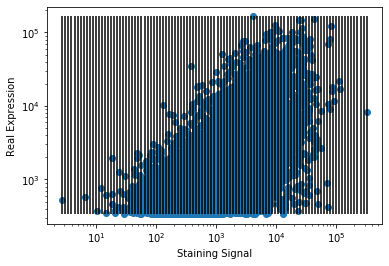

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



matrix_noise=pd.read_csv('Staining_noise.csv')


matrix_noise=matrix_noise[matrix_noise['CD8 : APC - Area']>0]
matrix_noise=matrix_noise[matrix_noise['GFP - Area']>0]
myc=matrix_noise['CD8 : APC - Area']
GFP=matrix_noise['GFP - Area']



x=myc
xmin=x.min()
xmax=x.max()
xmin=np.log10(xmin)
xmax=np.log10(xmax)

xbins=100

xbin=np.zeros(xbins+1)

xbin[0]=xmin
xbin[xbins]=xmax

    
for index in range(xbins-1):
    diff=(xmax-xmin)/(xbins)
    add=xbin[index]+diff
    xbin[index+1]=add
xbin=10**(xbin)

plt.scatter(myc,GFP)
plt.vlines(xbin,GFP.min(),GFP.max())
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Staining Signal')
plt.ylabel('Real Expression')
plt.show()




C:\Users\idmjk\anaconda3\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide
C:\Users\idmjk\anaconda3\lib\site-packages\ipykernel_launcher.py:173: RuntimeWarning: invalid value encountered in greater


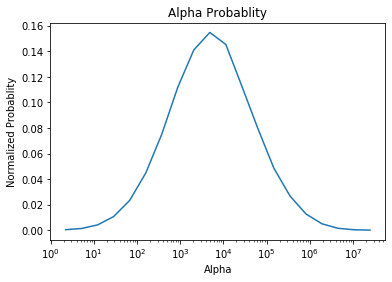

4863.30559408821
198.33159979999982


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu May  7 14:46:03 2020

@author: Kaiyi Jiang
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import concurrent.futures 
import time

tic=time.perf_counter()
matrix_noise=pd.read_csv('Staining_noise.csv')
data=pd.read_csv('Kinase_Sub_P.csv')

data=data[data['Flag : Alexa Fluor 680 - Area']>0]
data=data[data['Myc : Alexa Fluor 750 - Area']>0]
data=data[data['hospho : PE - Area']>0]
data1=data
data=data.head(100)
kinase=data['Flag : Alexa Fluor 680 - Area']
substrate=data['Myc : Alexa Fluor 750 - Area']
PE=data['hospho : PE - Area']


matrix_noise=matrix_noise[matrix_noise['CD8 : APC - Area']>0]
matrix_noise=matrix_noise[matrix_noise['GFP - Area']>0]
myc=matrix_noise['CD8 : APC - Area']
GFP=matrix_noise['GFP - Area']

def binary_search(arr,low,high, x):
    max_value = arr.max()
    min_value=arr.min()
    if x>=max_value:
        return len(arr)-2
    elif x<min_value:
        return 0
    else:
        mid = round((high + low) / 2)

        if x>=arr[mid] and x<arr[mid+1]:
            return mid

        elif x<arr[mid]:
            return binary_search(arr, low, mid - 1, x)
        elif x>=arr[mid+1]:
            return binary_search(arr, mid + 1, high, x)

def noiselevel(stain,GFP,xbins,ybins):
    #calculate probablity of real given observed
    #Data stored with stain being observed, GFP being real
    combine=pd.concat([stain,GFP],axis=1)
    combine=np.log10(combine)
    x=combine.iloc[:,0]
    y=combine.iloc[:,1]
    xmin=x.min()
    ymin=y.min()
    xmax=x.max()
    ymax=y.max()
    xbin=np.zeros(xbins+1)
    ybin=np.zeros(ybins+1)
    xbin[0]=xmin
    xbin[xbins]=xmax
    ybin[0]=ymin
    ybin[ybins]=ymax
    
    for index in range(xbins-1):
        diff=(xmax-xmin)/(xbins)
        add=xbin[index]+diff
        xbin[index+1]=add
    
    for index in range(ybins-1):
        diff=(ymax-ymin)/(ybins)
        add=ybin[index]+diff
        ybin[index+1]=add
    
    histogram=np.zeros((ybins,xbins))
    
    for index in range(xbins):
        if index < xbins-1:
            mask=combine.iloc[:,0]>=xbin[index]
            mask2=combine.iloc[:,0]<xbin[index+1]
        else:
            mask=combine.iloc[:,0]>=xbin[index]
            mask2=combine.iloc[:,0]<=xbin[index+1]

        gfp=combine[mask & mask2]
        gfp=gfp.iloc[:,1]
        count,bin_edge=np.histogram(gfp,bins=ybin)
        summation=sum(count)
        count=count/summation
        histogram[:,index]=count
    xbin=10**(xbin)
    ybin=10**(ybin)
    list=[histogram,xbins,xbin,ybins,ybin]
    return list

noise_phosphotase=noiselevel(myc,GFP,100,100)


def findreal(list,kinase):
    histogram=list[0]
    xbins=list[1]
    xbin=list[2]
    ybins=list[3]
    ybin=list[4]
    low=0
    high=xbins-1

    k_index=binary_search(xbin,low,high,kinase)

    pdf=histogram[:,k_index]
    
    mean_y=[]
    for index in range(ybins):
        mean=(ybin[index]+ybin[index+1])/2
        mean_y.append(mean)
    
    return pdf,mean_y


    
    
def singlecell(list_k,list_s,list_pe,kinase,substrate,PE):
    k_pdf,mean_k=findreal(list_k,kinase)
    s_pdf,mean_s=findreal(list_s,substrate)
    p_pdf,mean_p=findreal(list_pe,PE)


    prob=np.stack(np.meshgrid(k_pdf,s_pdf,p_pdf),-1).reshape(-1,3)
    alpha_store=np.stack(np.meshgrid(mean_k,mean_s,mean_p),-1).reshape(-1,3)
    k=alpha_store[:,0]
    s=alpha_store[:,1]
    p=alpha_store[:,2]
    probablity=prob[:,0]*prob[:,1]*prob[:,2]
    alpha_calc=(p-k)*(p-s)/p

    combine=np.vstack([alpha_calc,probablity])
    return combine


def multicell(list_k,list_s,list_pe,kinase,substrate,PE):

    combine=pd.concat([kinase,substrate,PE],axis=1)
    size=len(combine)
    total = np.zeros((2, list_k[3] ** 3 * size))
    for index in range(size):
        a=singlecell(list_k,list_s,list_pe,combine.iloc[index,0],combine.iloc[index,1],combine.iloc[index,2])
        start=list_k[3]**3*index
        end=list_k[3]**3*(index+1)
        total[:,start:end]=a

    # def helper(kinase,substrate,PE):
    #     return singlecell(histogram_k,histogram_s,histogram_p,xbins,xbin,ybins,ybin,kinase,substrate,PE)
    #
    # total=np.array(([0],[0]))
    # if __name__ == '__main__':
    #     with concurrent.futures.ThreadPoolExecutor() as executors:
    #       for result in executors.map(helper,kinase,substrate,PE):
    #           total=np.hstack([total,result])
    # total=np.delete(total,0,axis=1)

    return total

def alphacalc(alpha_bins,list_k,list_s,list_pe,kinase,substrate,PE):
              
    total=multicell(list_k,list_s,list_pe,kinase,substrate,PE)
    #how to process alpha 
    #for now alpha must be positive
    # log probablity is used
    total=total.T
    total=total[total[:,1]>0]
    total=total[total[:,0]>0]
    total=total.T
    total[1,:]=np.log10(total[1,:])
    
    min_1=total[0,:].min()
    max_1=total[0,:].max()
    min_1=np.log10(min_1)
    max_1=np.log10(max_1)
    bin_alpha=np.zeros(alpha_bins+1)
    bin_alpha[0]=min_1
    bin_alpha[alpha_bins]=max_1
    for index in range(alpha_bins-1):
        diff=(max_1-min_1)/(alpha_bins)
        add=bin_alpha[index]+diff
        bin_alpha[index+1]=add
    bin_alpha=10**(bin_alpha)
    
    mean_alpha=[]
    for index in range(alpha_bins):
        mean=(bin_alpha[index]+bin_alpha[index+1])/2
        mean_alpha.append(mean)
    prob_alpha=np.zeros(len(mean_alpha))


    for n in range(len(total.T)):
        index=binary_search(bin_alpha,0,alpha_bins-1,total[0,n])
        prob_alpha[index]=prob_alpha[index]+total[1,n]
    
    prob_alpha=prob_alpha/sum(prob_alpha)
    
    return mean_alpha, prob_alpha

mean_alpha, prob_alpha=alphacalc(20,noise_phosphotase,noise_phosphotase,noise_phosphotase,kinase,substrate,PE)


plt.plot(mean_alpha,prob_alpha)
plt.xlabel('Alpha')
plt.ylabel('Normalized Probablity')
plt.title('Alpha Probablity')
plt.xscale('log')
plt.show()
max_index=np.argmax(prob_alpha)
alpha_max=mean_alpha[max_index]
print(alpha_max)
toc=time.perf_counter()
print(toc-tic)




## Add in Phosphatase

The next step is to add in phosphatase to the system. 

### Simple expressions for fraction of pplated substrates
To start with, there are in total 6 possible states of substrates. 
1. Unbound, unphosphorylated
2. Unbound, pplated
3. Kinase bound, unpplated
4. Kinase bound, pplated
5. Pptase bound, unpplated
6. Pptase bound, pplated

Then, we know that 
$$
[S]_{kinase bound,pplated} + [S]_{kinase bound,unpplated} +[S]_{pptase bound, pplated} + [S]_{pptase bound, unpplated} + [S]_{unbound, pplated} + [S]_{unbound, unpplated}=[S]_{tot}
$$
and
$$
[K]_{bound} + [K]_{unbound}=[K]_{tot}.
$$

$$
[P]_{bound} + [P]_{unbound}=[P]_{tot}.
$$

We are interested in the concentration of $[S]_{bound}$ since this is the fraction that will be manipulated. In particular, we will assume that bound substrates are phosphorylated by their kinases at some rate $k_a$ and dephosphorylated by phosphatase at some rate $k_d$. In addition we will assume that there is some background phosophorlyation rate $k_{bgs}$ and a background dephosphorylation $k_{bgd}$.
$$
{d [S]_{phosphorylated} \over dt} = k_a [S]_{kinase bound, unpplated} + k_{bg}[S]_{unbound,unpplated} -k_d[S]_{pptase bound, pplated} - k_{bgd} [S]_{unbound, pplated}
$$
At steady state, as expected we have that the left side of this is zero. Rearranging, this we have
$$
[S]_{unbound, phosphorylated} = {k_a \over k_{bgd}} [S]_{kinase bound, unpplated} + {k_{bg} \over k_{bgd}} [S]_{unbound, unpplated} - {k_d \over k_{bgd}} [S]_{pptase bound, pplated}
$$
For future reference, it will be also helpful to rewrite this in terms of two probabilities $p_{bound}$ and $p_{unbound}$ which just encode the probability that a substrate is bound/unbound to a kinase. In particular,
$$
p_{kinase bound, unpplated}= {[S]_{kinase bound, unpplated} \over [S]_{tot}}
$$
and
$$
p_{pptase bound,pplated}= {[S]_{pptase bound,pplated} \over [S]_{tot}}
$$
and
$$
p_{unbound,unpplated}= {[S]_{unbound,unpplated} \over [S]_{tot}}
$$
In terms of this, we see that the fraction of unbound phosphorylated substrates $f$ are just given by
$$
f={[S]_{unbound, pplated}\over [S]_{tot}}={k_a \over k_{bgd}} p_{kinase bound,unpplated} + {k_{bg} \over k_{bgd}} p_{unbound, unpplated} - {k_d \over k_{bgd}} p_{pptase bound, pplated}
$$
It will be useful to define ratios $v_a={k_a \over k_{bgd}}$ and $v_bg={k_{bg} \over k_{bgd}}$ and $v_d={k_d \over k_{bgd}}$. In terms of these we have that
$$
f={[S]_{unbound, pplated}\over [S]_{tot}}=v_a p_{kinase bound, unpplated} + v_{bg} p_{unbound, unpplated} + v_d p_{pptase bound, pplated}
$$

### Calculating bound and unbound kinase and substrate fractions 

We see the problem is now reduced to calculating the fraction of kinase and substrates that are bound to each other. To do this, we can write a simple kinetic equation. Let us now consider 
$$
{d[S]_{kinase bound} \over dt}= k_{on1}[S]_{unbound}[K]_{unbound} - k_{off1}[S]_{kinase bound}\\
{d[S]_{pptase bound} \over dt}= k_{on2}[S]_{unbound}[P]_{unbound} - k_{off2}[S]_{pptase bound}\\
{d[K]_{bound} \over dt}= k_{on1}[S]_{unbound}[K]_{unbound} - k_{off1}[K]_{bound}\\
{d[P]_{bound} \over dt}= k_{on2}[S]_{unbound}[P]_{unbound} - k_{off2}[P]_{bound}
$$

It will be helpful to rewrite this just in terms of the the bound fraction
$$
{d[S]_{kinase bound} \over dt}= k_{on1}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([K]_{tot}-[K]_{bound})  - k_{off1}[S]_{kinase bound}\\
{d[S]_{pptase bound} \over dt}= k_{on2}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([P]_{tot}-[P]_{bound})  - k_{off2}[S]_{pptase bound}\\
{d[K]_{bound} \over dt}= k_{on1}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([K]_{tot}-[K]_{bound}) - k_{off1}[K]_{bound}\\
{d[P]_{bound} \over dt}= k_{on2}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([P]_{tot}-[P]_{bound}) - k_{off2}[P]_{bound}
$$
At steady-state these equations become
$$
{k_{on1} \over k_{off1}}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([K]_{tot}-[K]_{bound})- [S]_{kinase bound}=0\\
{k_{on1} \over k_{off1}}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([K]_{tot}-[K]_{bound})-[K]_{bound}=0\\
{k_{on2}\over k_{off2}}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([P]_{tot}-[P]_{bound}) - [S]_{pptase bound}=0\\
{k_{on2}\over k_{off2}}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([P]_{tot}-[P]_{bound}) - [P]_{bound}=0
$$
Let us define $\alpha^{-1}={k_{on1} \over k_{off1}}$ and $\beta^{-1}={k_{on2} \over k_{off2}}$
Notice that these equations imply that $[S]_{kinase bound}=[K]_{bound}$ and $[S]_{pptase bound}=[P]_{bound}$. Plugging this into the equation above gives
$$
\alpha^{-1}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([K]_{tot}-[K]_{bound})- [S]_{kinase bound}=0
$$
$$
\beta^{-1}([S]_{tot}-[S]_{kinase bound}-[S]_{pptase bound})([P]_{tot}-[P]_{bound}) - [S]_{pptase bound}=0
$$


